In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import matplotlib.pyplot as plt

In [11]:
import glob, os, random

In [12]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'garbage_classification',
    image_size=(384, 512),
    shuffle=True,
)

Found 5054 files belonging to 6 classes.


In [14]:
class_names = dataset.class_names
class_names

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [15]:
len(dataset)

158

(32, 384, 512, 3)
[2 4 0 4 0 0 1 4 3 1 1 5 4 3 0 4 3 3 3 0 1 4 3 3 0 3 4 3 1 2 2 2]


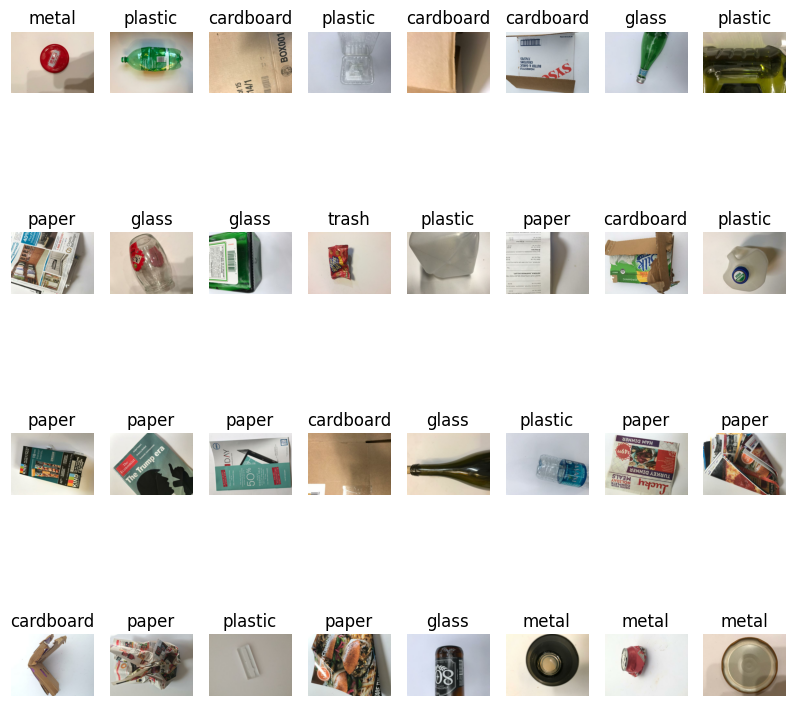

In [16]:
plt.figure(figsize=(10,10))
for image_batches, label_batches in dataset.take(1):
    print(image_batches.shape)
    print(label_batches.numpy())
    
    for i in range(32):
        plt.subplot(4, 8, i+1)
        plt.imshow(image_batches[i].numpy().astype('uint8'))
        plt.axis('off')
        plt.title(class_names[label_batches[i]])       

In [18]:
train_datagen= ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

In [19]:
train_generator = train_datagen.flow_from_directory(
    'garbage_classification',
    target_size=(300,300),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

validation_genrator = test_datagen.flow_from_directory(
    'garbage_classification',
    target_size=(300,300),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

Found 4551 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [21]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

print(labels)

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [22]:
input_shape=(300, 300, 3)
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Flatten(),
    
    Dense(64, activation='relu'),
    Dense(6, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 32)       0

In [24]:
hist=model.fit_generator(train_generator, epochs=5, validation_data=validation_genrator)

C:\Users\gauta\AppData\Local\Temp\ipykernel_3764\3988718865.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=model.fit_generator(train_generator, epochs=5, validation_data=validation_genrator)


Epoch 1/5
285/285 [==============================] - 753s 3s/step - loss: 1.5004 - acc: 0.3731 - val_loss: 1.3219 - val_acc: 0.4891
Epoch 2/5
285/285 [==============================] - 618s 2s/step - loss: 1.2571 - acc: 0.5056 - val_loss: 1.2061 - val_acc: 0.5368
Epoch 3/5
285/285 [==============================] - 679s 2s/step - loss: 1.1399 - acc: 0.5627 - val_loss: 1.2678 - val_acc: 0.5169
Epoch 4/5
285/285 [==============================] - 680s 2s/step - loss: 1.0613 - acc: 0.6045 - val_loss: 1.0667 - val_acc: 0.5646
Epoch 5/5
285/285 [==============================] - 990s 3s/step - loss: 0.9676 - acc: 0.6425 - val_loss: 1.0506 - val_acc: 0.6004


In [31]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [34]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

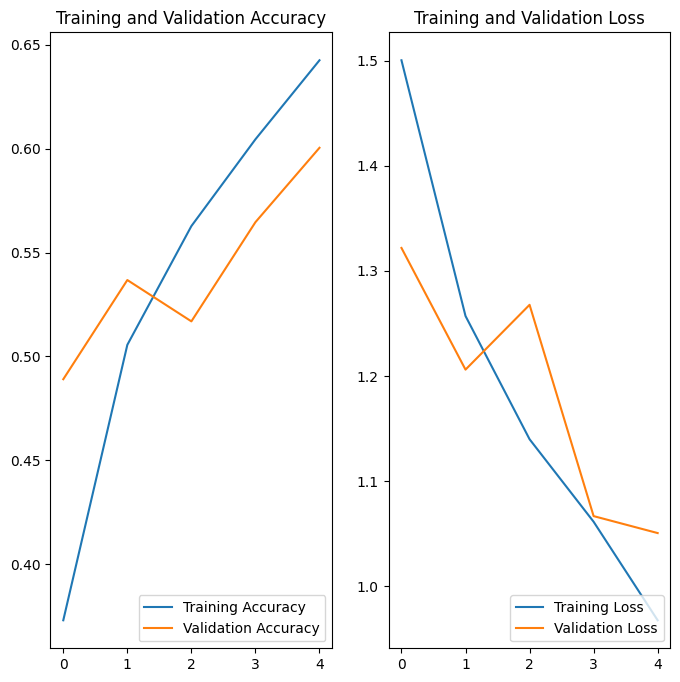

In [35]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(5), acc, label='Training Accuracy')
plt.plot(range(5), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(5), loss, label='Training Loss')
plt.plot(range(5), val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

1/1 [==============================] - 1s 1s/step


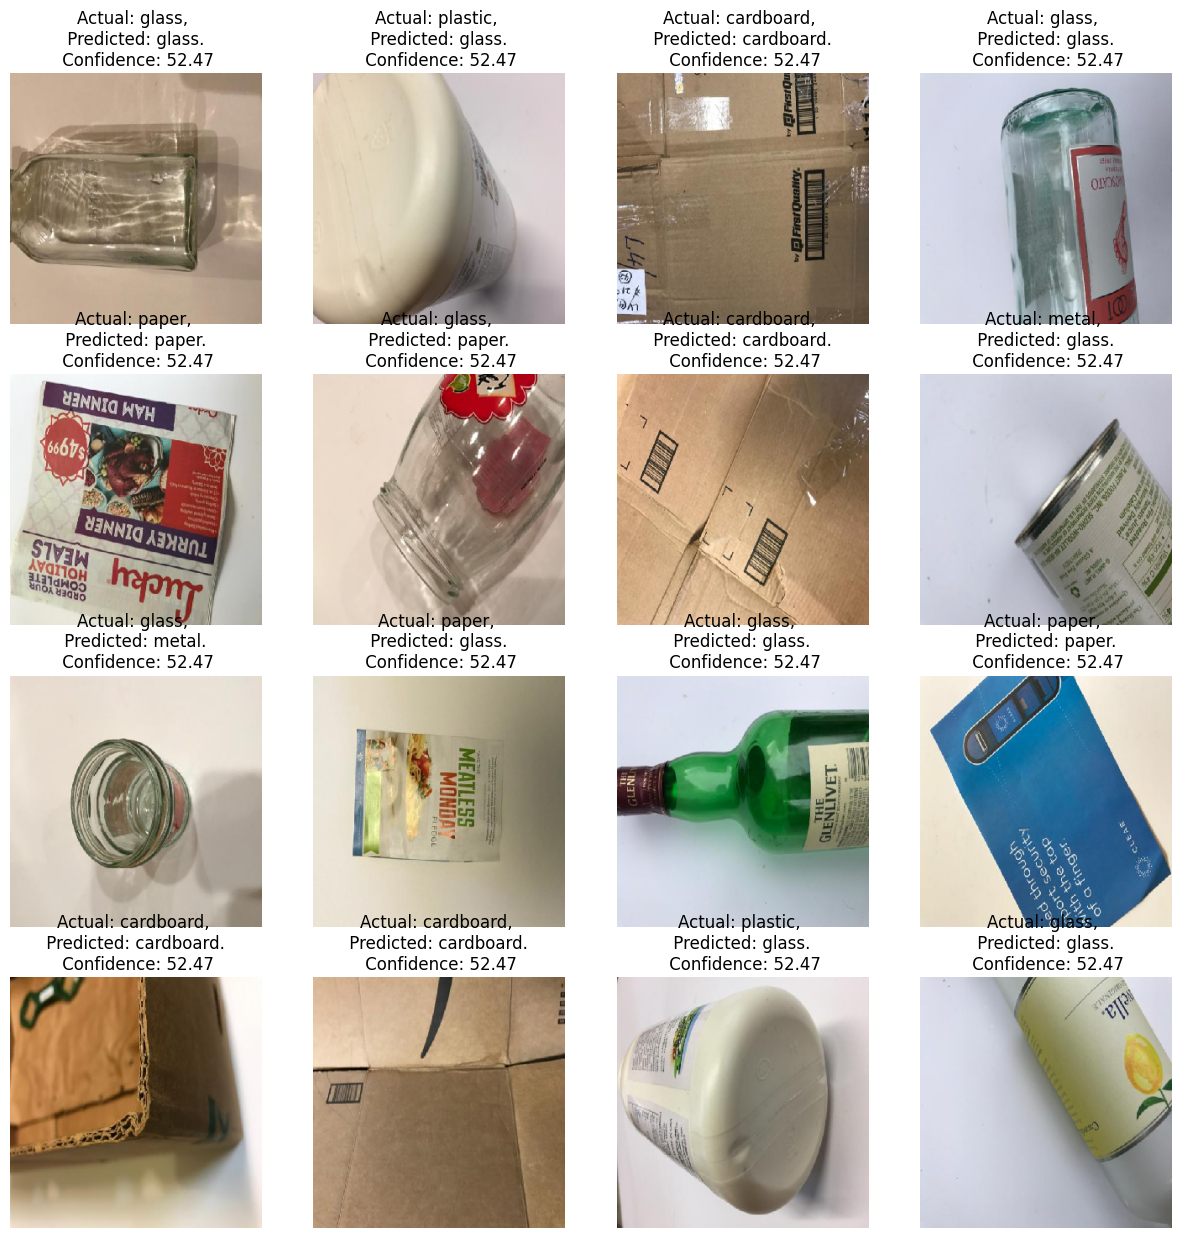

In [43]:
test_x, test_y=validation_genrator.__getitem__(1)

preds = model.predict(test_x)
confidence = round(100*(np.max(preds[0])), 2)

plt.figure(figsize=(15,15))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title(f'Actual: {labels[np.argmax(test_y[i])]}, \n Predicted: {labels[np.argmax(preds[i])]}. \n Confidence: {confidence}')
    plt.imshow(test_x[i])
    plt.axis('off')